In [1]:
import os
from pathlib import Path
import re

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({ 
    "bit": pd.Series(dtype="string"),
    "test": pd.Series(dtype="str"),
    "success": pd.Series(dtype="int"),
    "p_value": pd.Series(dtype="float"),
})

for root, _, files in os.walk("results"):
    for file in files:
        if file == "stats.txt":
            _, bit, test = Path(root).parts
            with open(Path(root) / file) as f:
                for line in f:
                    match_obj = re.match(r"(SUCCESS|FAILURE)\s+p_value = (\d+\.\d+)", line)
                    if match_obj:
                        row = {
                            "bit": bit,
                            "test": test,
                            "success": match_obj.group(1) == "SUCCESS",
                            "p_value": float(match_obj.group(2)),
                        }
                        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

In [3]:
df.groupby(["bit", "test"]).mean()

success   p_value
bit test                                  
0   ApproximateEntropy       0.8  0.308823
    BlockFrequency           0.8  0.189209
    CumulativeSums           0.0  0.000024
    DFT                      1.0  0.520515
    Frequency                0.0  0.000030
...                          ...       ...
9   OverlappingTemplate      0.0  0.000000
    Rank                     0.0  0.000000
    Runs                     0.0  0.000000
    Serial                   0.0  0.000000
    Universal                0.0  0.000000

[184 rows x 2 columns]

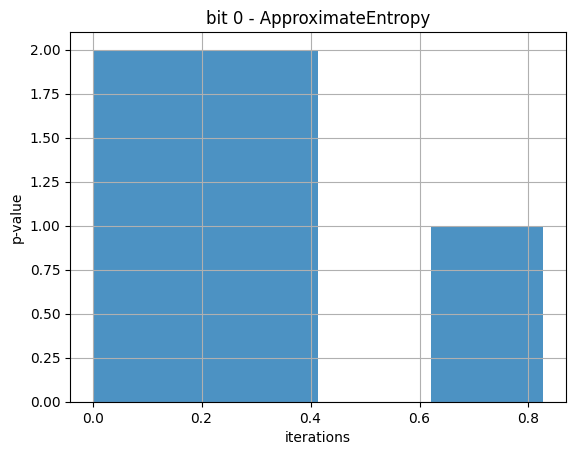

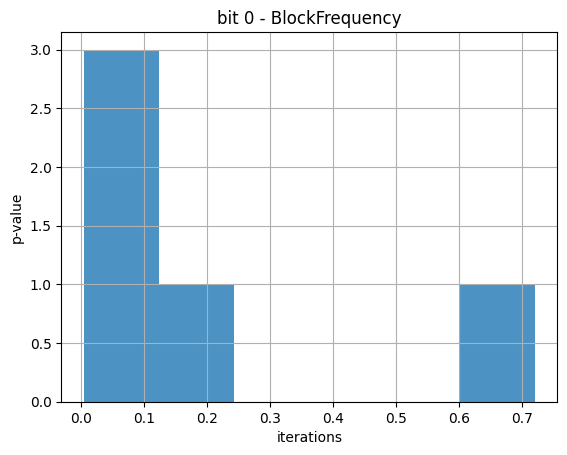

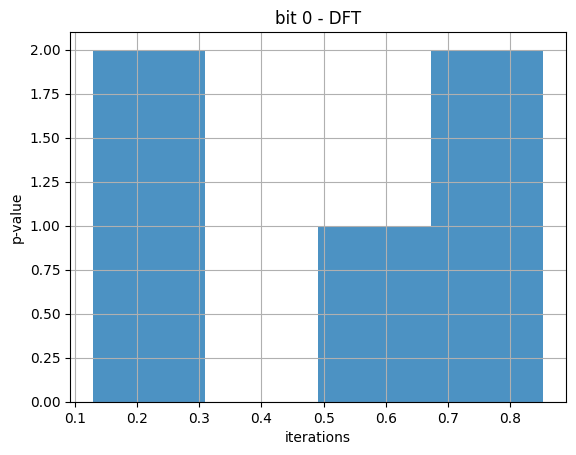

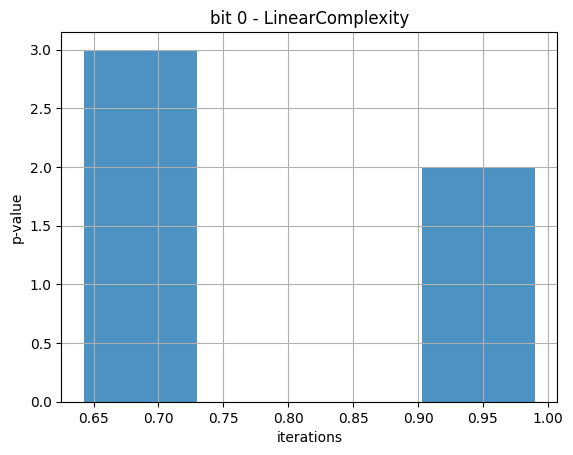

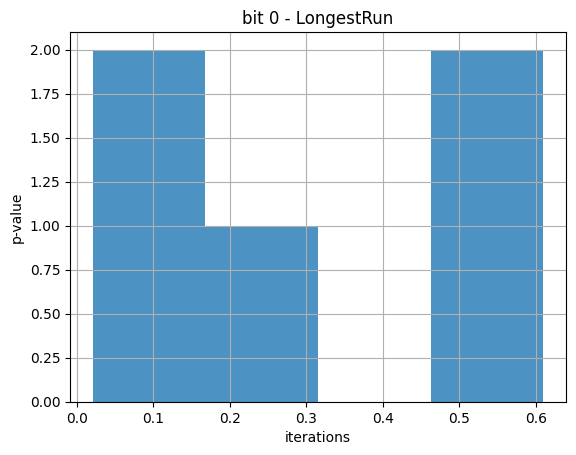

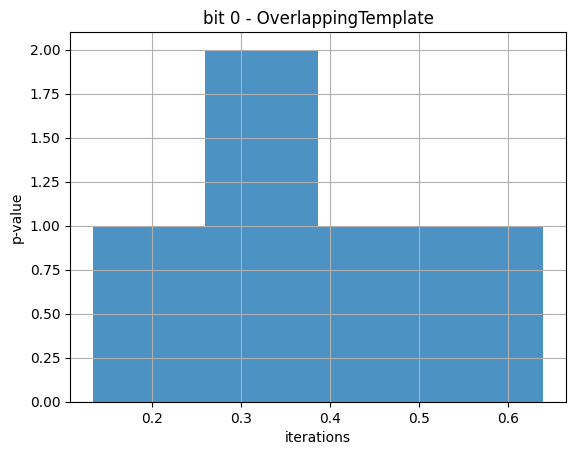

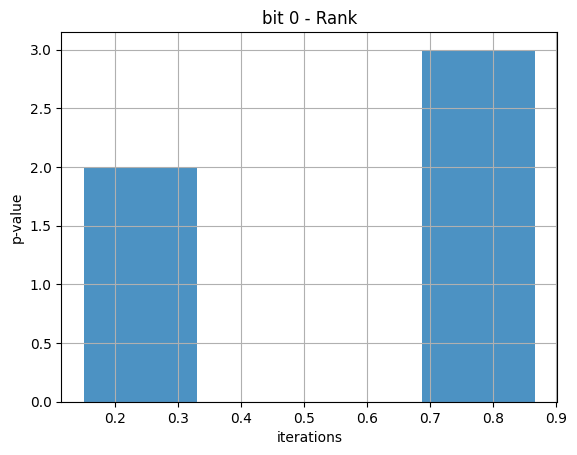

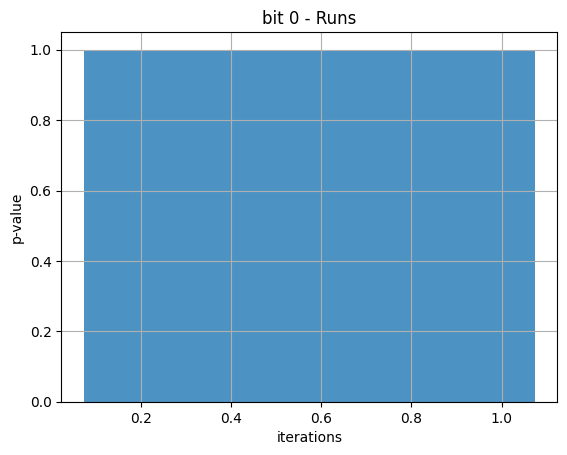

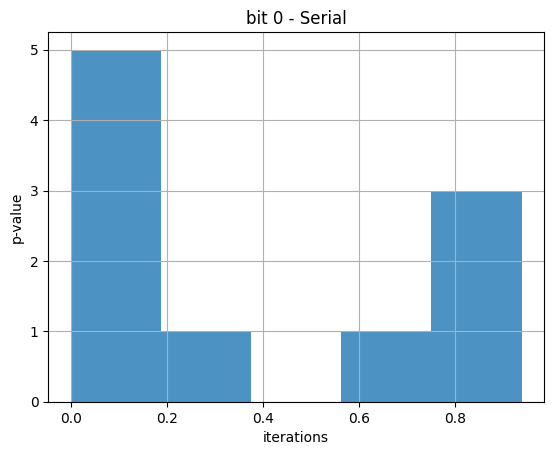

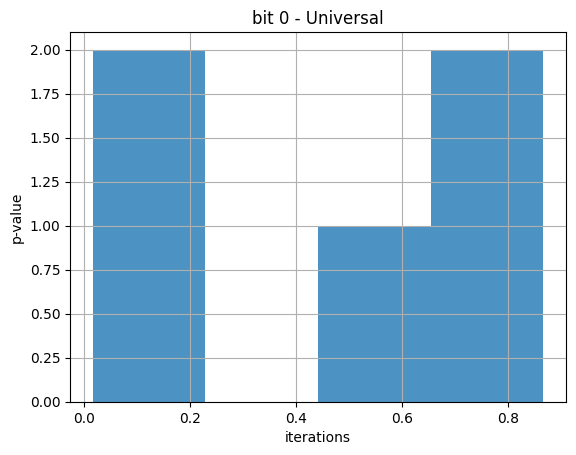

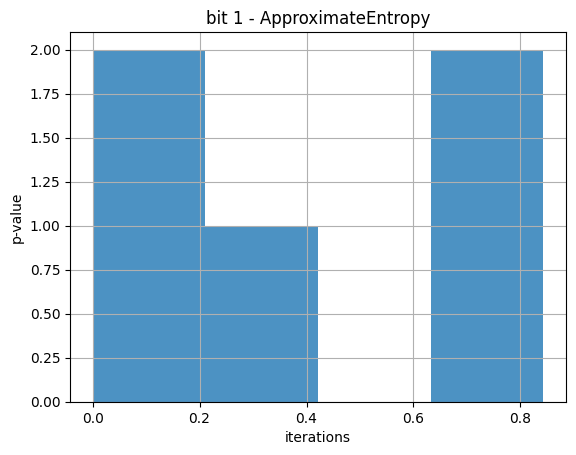

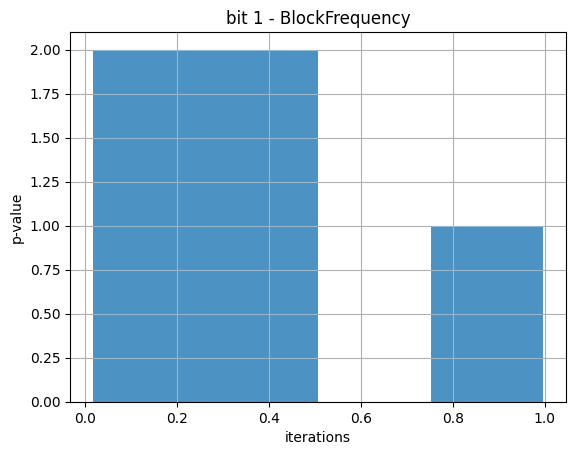

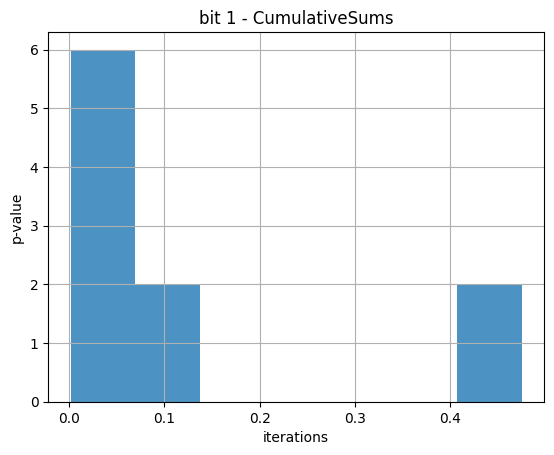

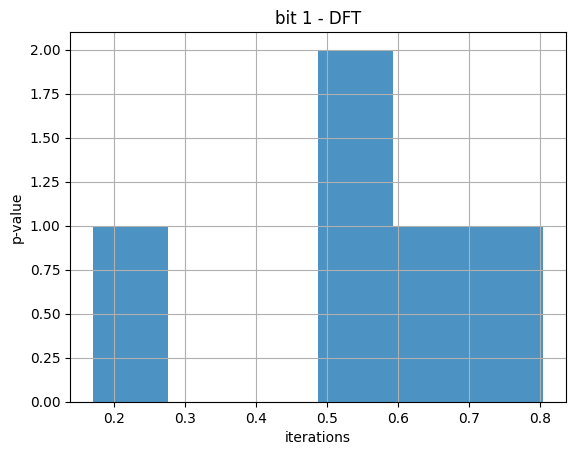

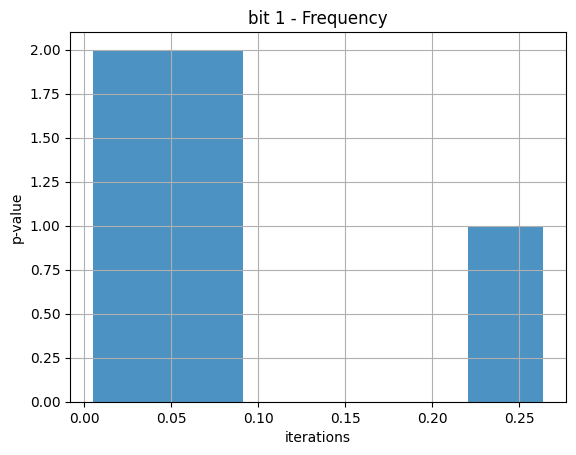

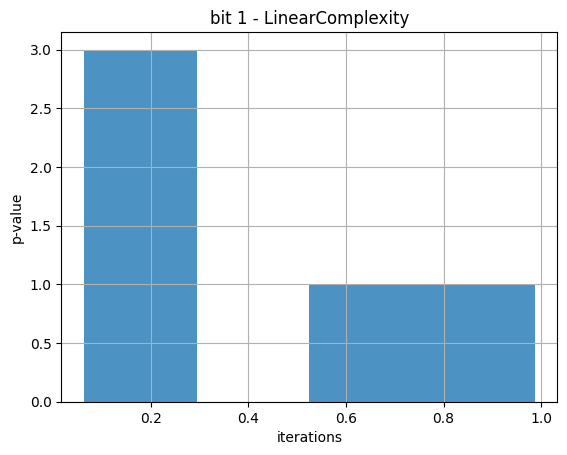

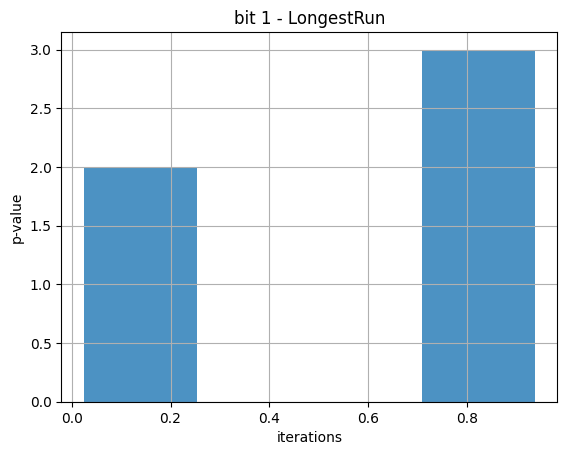

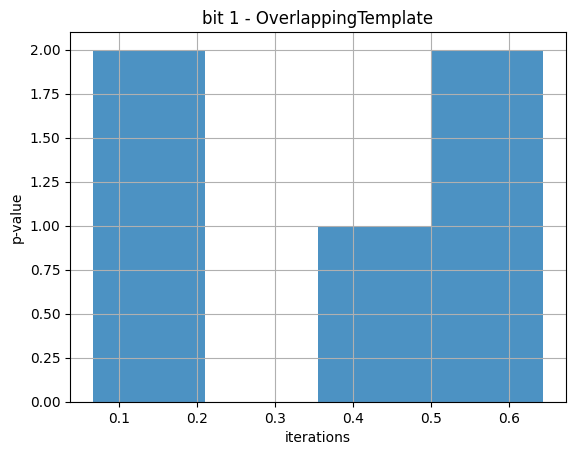

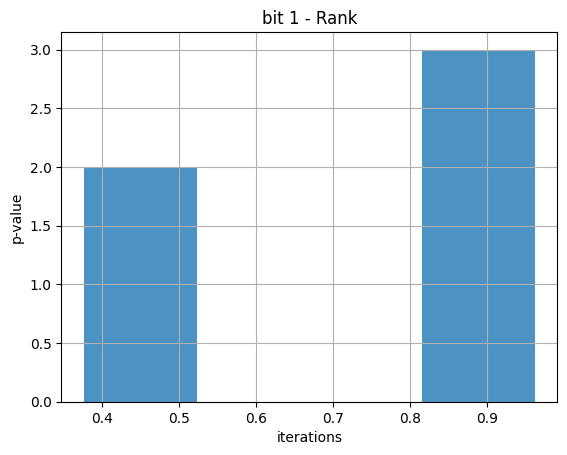

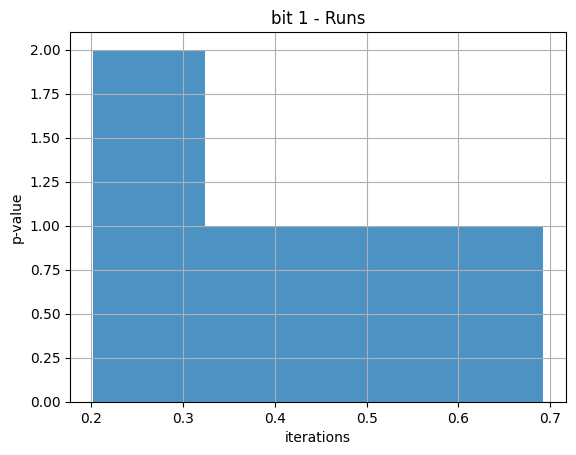

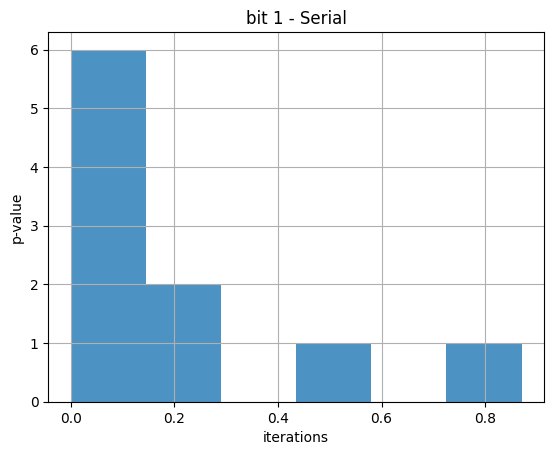

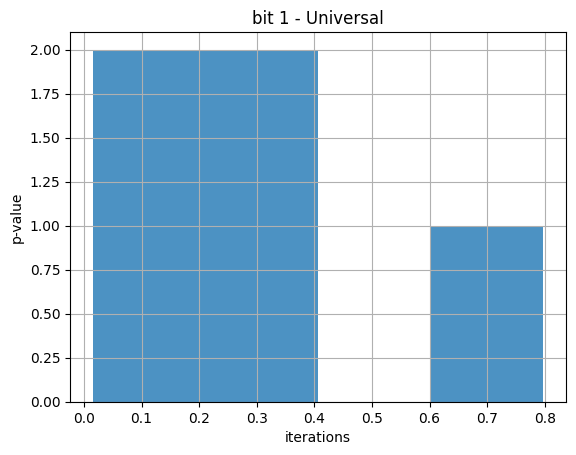

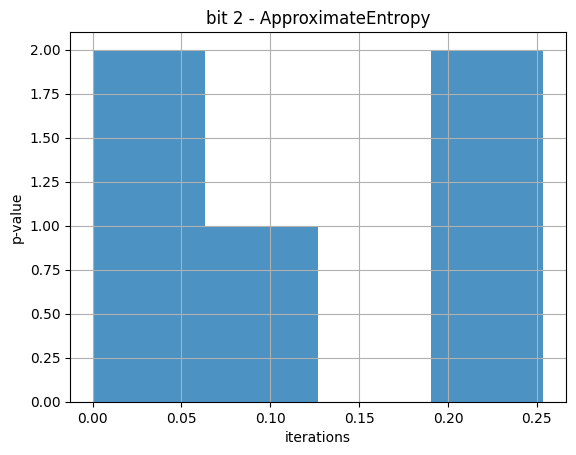

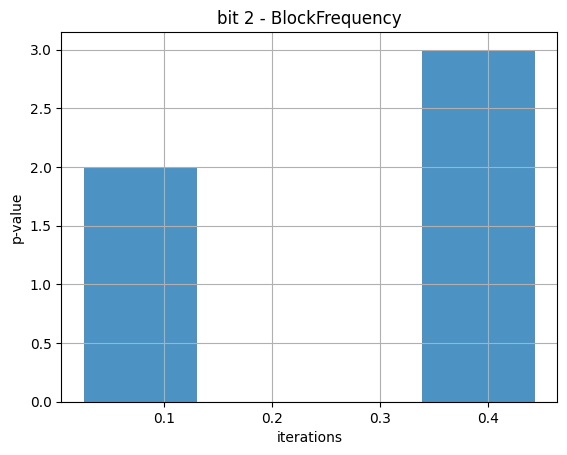

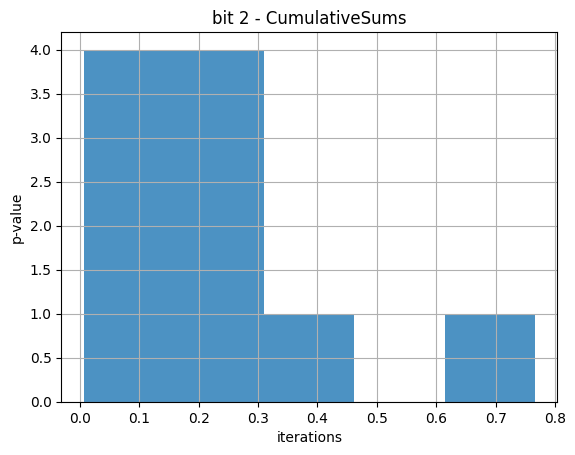

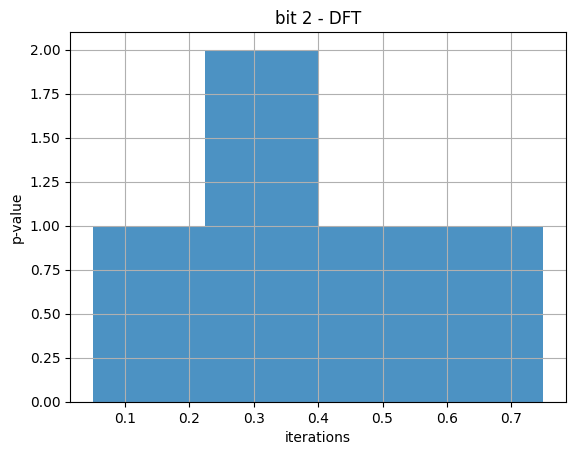

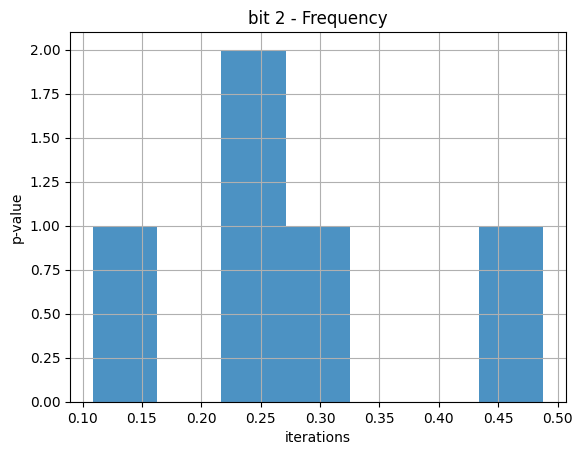

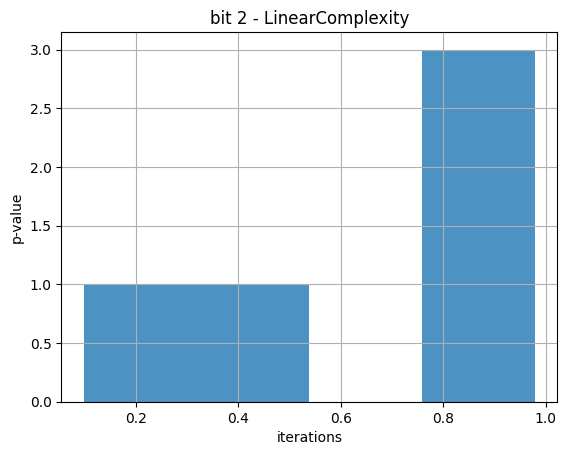

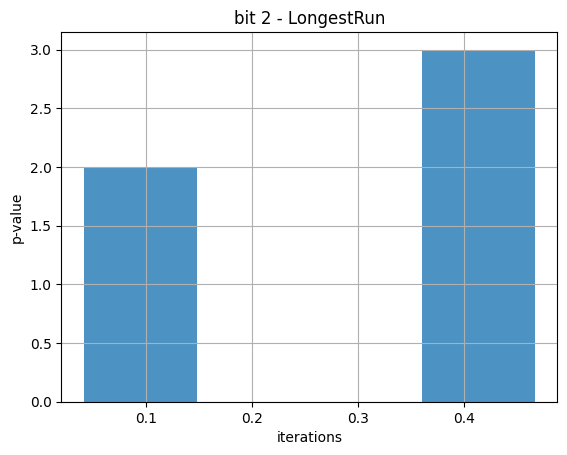

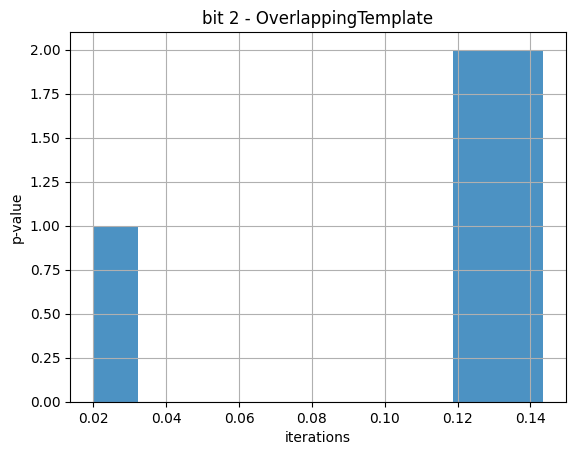

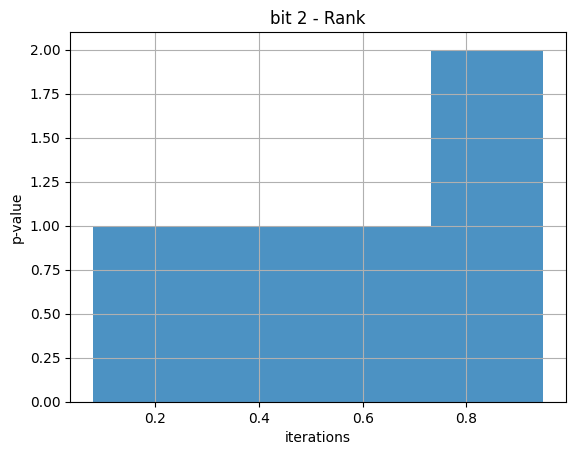

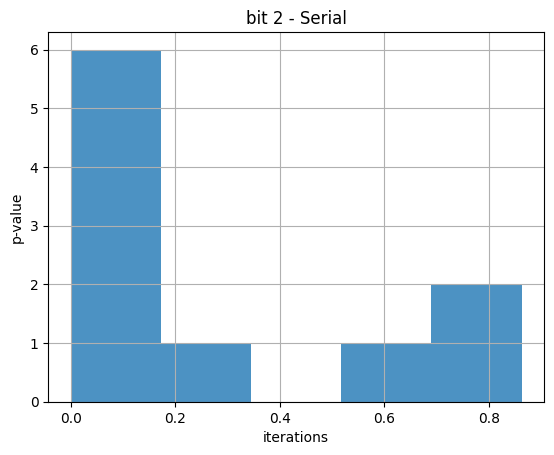

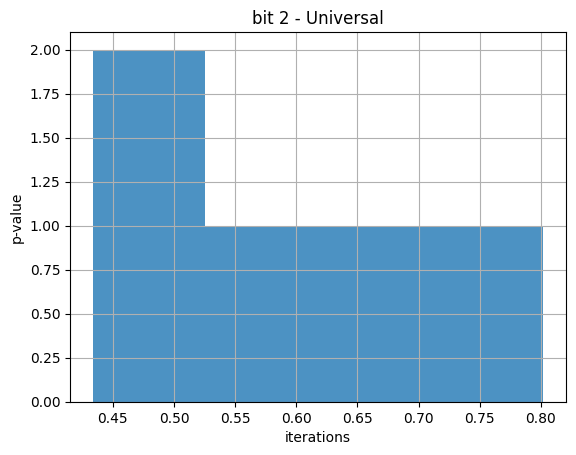

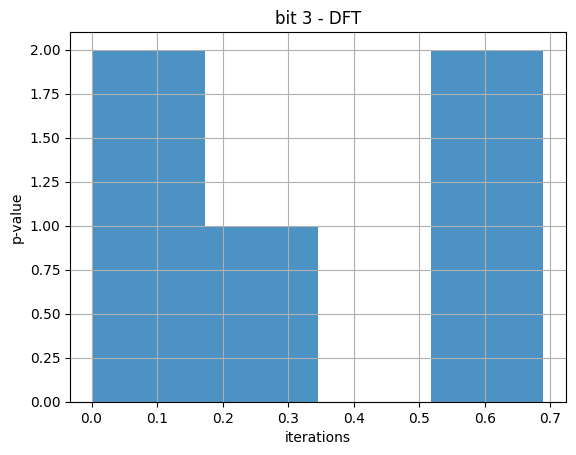

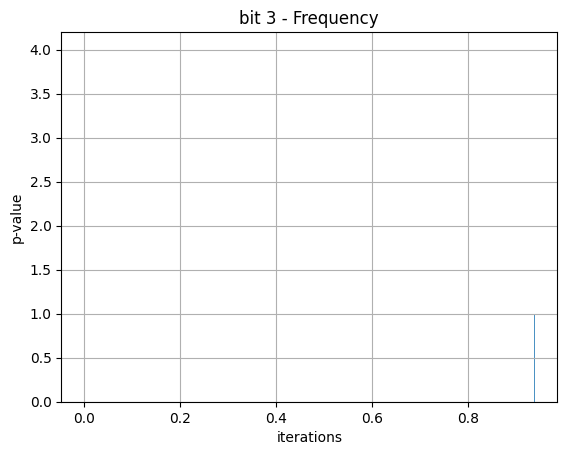

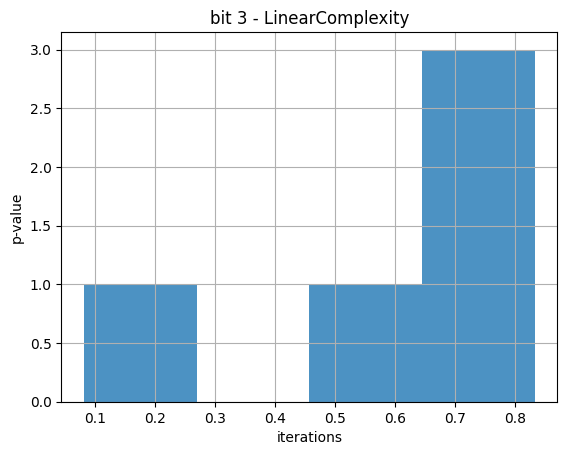

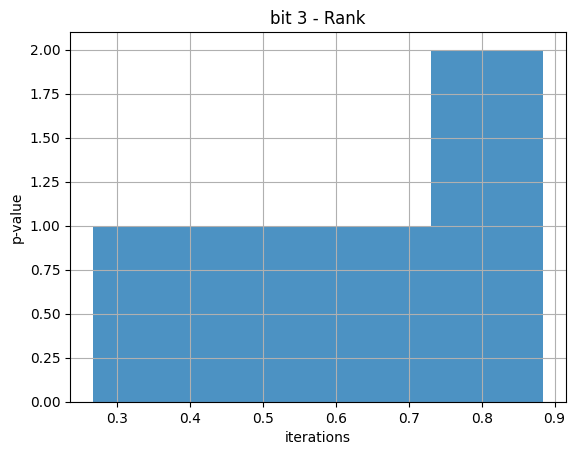

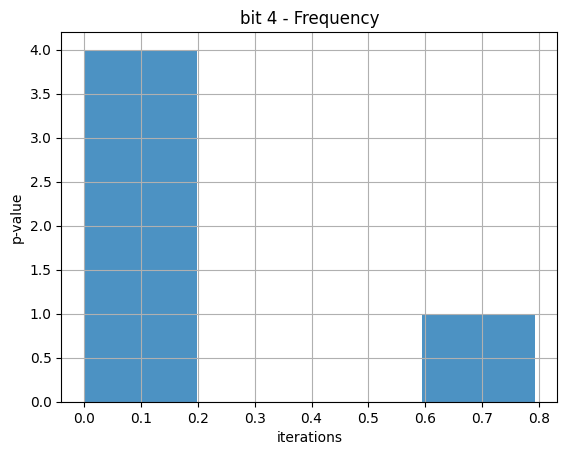

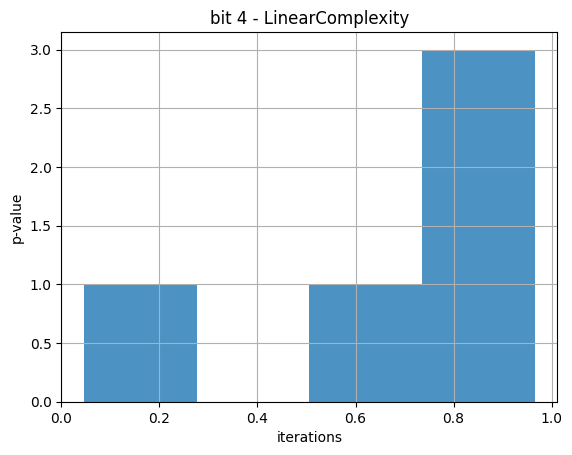

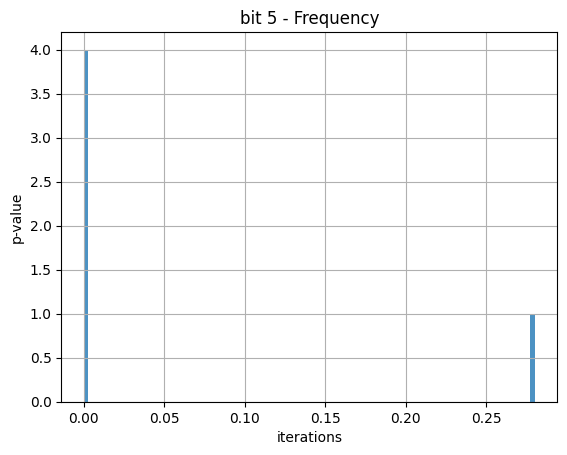

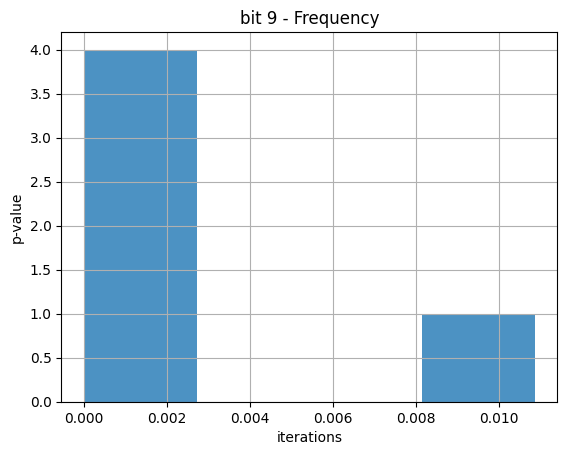

In [4]:
def create_plot(sf, title=None):
    fig, ax = plt.subplots()

    if title:
        ax.set_title(title)
    
    # Histogram
    ax.set_xlabel("iterations")
    ax.set_ylabel("p-value")
    sf.hist(bins="auto", alpha=0.8, ax=ax)
    ax.grid(True)
    
    # fig.show()
    plt.show()
    return fig, ax

for (bit, test), df_group in df.groupby(["bit", "test"]):
    if df_group["success"].mean() > 0:
        create_plot(df_group["p_value"], f"bit {bit} - {test}")